In [14]:
import pandas as pd
import matplotlib.pyplot as plt
results = pd.read_csv("results.csv")
results

,Unnamed: 0,1_weeks_tsfresh,5_weeks_tsfresh,10_weeks_tsfresh,20_weeks_tsfresh,1_weeks_end2end,5_weeks_end2end,10_weeks_end2end,20_weeks_end2end,5_days_tsfresh,30_days_tsfresh,50_days_tsfresh,100_days_tsfresh
0,180,4,3,4,8,2,1,1,1,1,28,60,65
1,175,2,1,5,1,1,1,1,1,6,8,5,11
2,161,7,1,19,18,15,3,2,1,5,13,4,7
3,157,1,1,6,7,7,1,1,1,2,49,50,71
4,156,11,14,26,12,13,14,13,4,4,22,24,16
5,149,8,4,7,2,1,4,2,1,1,3,9,5
6,147,1,2,2,13,3,1,1,1,1,51,52,22
7,138,3,1,4,5,15,2,2,5,9,18,13,13
8,126,1,1,9,3,1,1,1,1,1,10,21,16
9,118,4,2,2,8,2,2,2,2,2,9,5,2


In [15]:
results.describe()

,Unnamed: 0,1_weeks_tsfresh,5_weeks_tsfresh,10_weeks_tsfresh,20_weeks_tsfresh,1_weeks_end2end,5_weeks_end2end,10_weeks_end2end,20_weeks_end2end,5_days_tsfresh,30_days_tsfresh,50_days_tsfresh,100_days_tsfresh
count,21.000000,21.000000,21.000000,21.000000,21.000000,21.000000,21.000000,21.000000,21.000000,21.000000,21.000000,21.000000,21.000000
mean,95.619048,3.047619,2.952381,6.571429,6.619048,4.047619,2.095238,2.523810,1.428571,4.428571,18.857143,23.714286,24.857143
std,60.082840,2.940683,2.940683,6.152816,4.811197,4.769446,2.861901,2.976895,1.075706,5.390468,14.114835,17.533234,21.187935
min,8.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,4.000000,2.000000
25%,39.000000,1.000000,1.000000,3.000000,2.000000,1.000000,1.000000,1.000000,1.000000,1.000000,10.000000,13.000000,13.000000
50%,97.000000,1.000000,2.000000,5.000000,6.000000,2.000000,1.000000,1.000000,1.000000,2.000000,16.000000,17.000000,16.000000
75%,149.000000,4.000000,4.000000,9.000000,9.000000,3.000000,2.000000,2.000000,1.000000,6.000000,22.000000,26.000000,27.000000
max,180.000000,11.000000,14.000000,26.000000,18.000000,15.000000,14.000000,13.000000,5.000000,25.000000,51.000000,60.000000,74.000000


Text(0.5, 1.0, 'average number of final nodes in GUIDE simple linear tree')

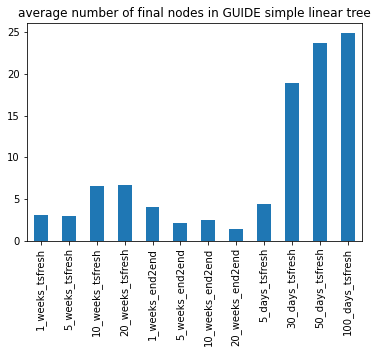

In [16]:
plt.figure()
plot = results.iloc[:,1:20].mean().plot(kind="bar")
plt.title("average number of final nodes in GUIDE simple linear tree")

In [19]:
ml_results = pd.read_csv("results_ml.csv")

Text(0.5, 1.0, 'average number of final nodes in GUIDE multiple linear tree')

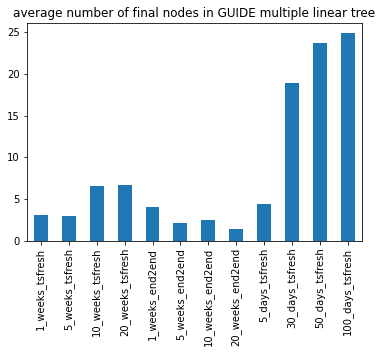

In [20]:
plt.figure()
plot = ml_results.iloc[:,1:20].mean().plot(kind="bar")
plt.title("average number of final nodes in GUIDE multiple linear tree")

In [21]:
ml_results.describe()

,Unnamed: 0,1_weeks_tsfresh,5_weeks_tsfresh,10_weeks_tsfresh,20_weeks_tsfresh,1_weeks_end2end,5_weeks_end2end,10_weeks_end2end,20_weeks_end2end,5_days_tsfresh,30_days_tsfresh,50_days_tsfresh,100_days_tsfresh
count,21.000000,21.000000,21.000000,21.000000,21.000000,21.000000,21.000000,21.000000,21.000000,21.000000,21.000000,21.000000,21.000000
mean,95.619048,3.047619,2.952381,6.571429,6.619048,4.047619,2.095238,2.523810,1.428571,4.428571,18.857143,23.714286,24.857143
std,60.082840,2.940683,2.940683,6.152816,4.811197,4.769446,2.861901,2.976895,1.075706,5.390468,14.114835,17.533234,21.187935
min,8.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,4.000000,2.000000
25%,39.000000,1.000000,1.000000,3.000000,2.000000,1.000000,1.000000,1.000000,1.000000,1.000000,10.000000,13.000000,13.000000
50%,97.000000,1.000000,2.000000,5.000000,6.000000,2.000000,1.000000,1.000000,1.000000,2.000000,16.000000,17.000000,16.000000
75%,149.000000,4.000000,4.000000,9.000000,9.000000,3.000000,2.000000,2.000000,1.000000,6.000000,22.000000,26.000000,27.000000
max,180.000000,11.000000,14.000000,26.000000,18.000000,15.000000,14.000000,13.000000,5.000000,25.000000,51.000000,60.000000,74.000000
